# Capstone project 1: House prices advanced regression

## Machine Learning - Xgboost Model

In [1]:
import pandas as pd
import numpy as np

import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load training and testing data
y_scaler = float(open('y_scale_factor.txt','r').read())
X = pd.read_csv('./data/train_scale.csv',index_col=0)
y = pd.read_csv('./data/train.csv',index_col=0)['SalePrice']*y_scaler

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=8)

In [4]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 318), (438, 318), (1022,), (438,))

### Fine Tuning Models

In [53]:
# investigate parameter n_estimator
test_score = []
train_score = []
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15000000000000002,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
             n_estimators=50*n, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.8500000000000001, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

In [54]:
# Plot model accuracy
def plot_accuracy(train_score,test_score,step):

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,2,1)
    plt.plot(np.arange(1,10)*step, train_score)
    plt.ylabel('r2 of training')
    plt.xlabel('Training')
    ax = fig.add_subplot(1,2,2)
    plt.plot(np.arange(1,10)*step, test_score)
    plt.xlabel('Testing')

Text(0.5, 1.0, 'n_estimators')

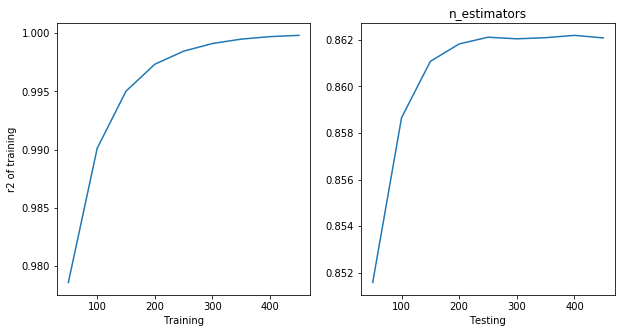

In [57]:

plot_accuracy(train_score,test_score,50) # 350 would be sufficient
plt.title('n_estimators')

In [27]:
# Learning_rate:

test_score = []
train_score = []
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.02*n,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.8500000000000001, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

Text(0.5, 1.0, 'Learning rate')

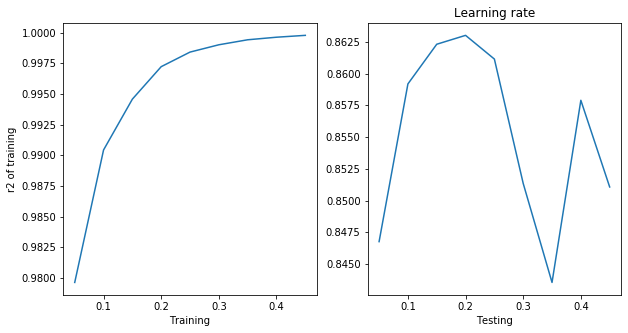

In [52]:
plot_accuracy(train_score,test_score,0.05) # 0.2 would best
plt.title('Learning rate')


In [58]:
# max_depth

test_score = []
train_score = []
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=n, min_child_weight=1, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.8500000000000001, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

Text(0.5, 1.0, 'Maximum depth')

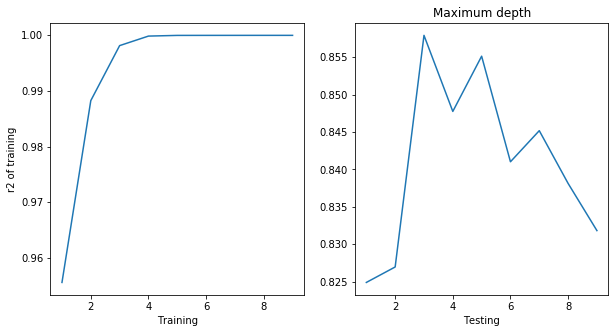

In [59]:
plot_accuracy(train_score,test_score,1) # 3 would be good
plt.title('Maximum depth')

In [60]:
# subsample

test_score = []
train_score = []
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.09*n, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

Text(0.5, 1.0, 'subsample')

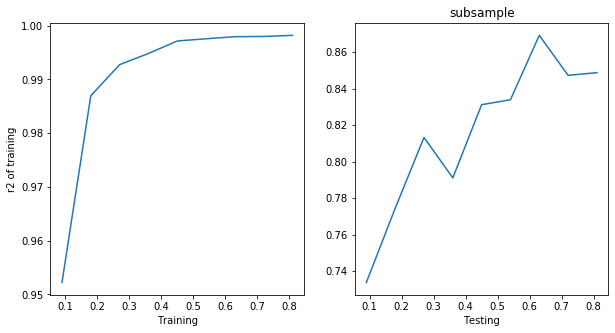

In [61]:
plot_accuracy(train_score,test_score,0.09) # 0.65 would be good
plt.title('subsample')

In [63]:
# colsample_bytree

test_score = []
train_score = []
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=n*0.1, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.65, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

Text(0.5, 1.0, 'colsample')

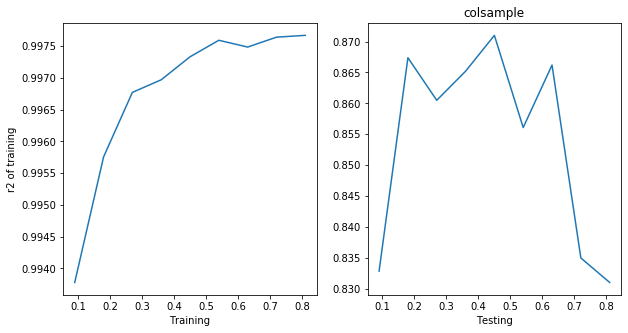

In [64]:
plot_accuracy(train_score,test_score,0.09) # 0.45 would be good
plt.title('colsample')

In [65]:
# min_child_weight

test_score = []
train_score = []
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.45, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=n, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.65, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

Text(0.5, 1.0, 'min_child_weight')

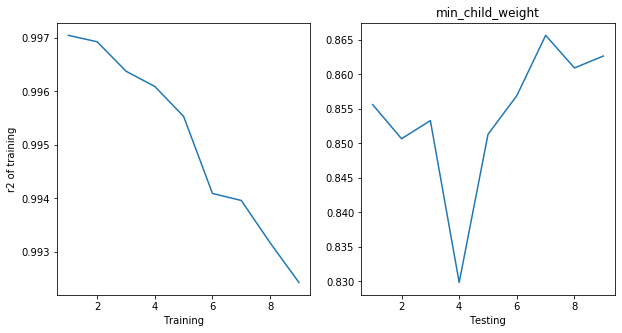

In [68]:
plot_accuracy(train_score,test_score,1) # 7 would be good
plt.title('min_child_weight')

In [76]:
# base_score

test_score = []
train_score = []
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.1*n, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.45, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=n, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.65, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

Text(0.5, 1.0, 'base score')

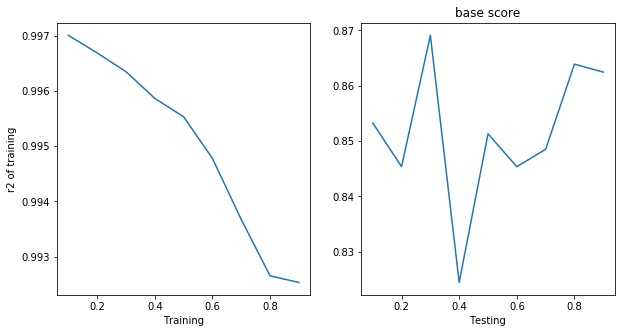

In [77]:
plot_accuracy(train_score,test_score,0.1) # 0.3 would be good
plt.title('base score')

In [78]:
# save model
print('best_score:{}'.format(test_score[2]))


best_score:0.8691081680526537


In [79]:
# Best model for testing accuracy:
model = xgb.XGBRegressor(base_score=0.3, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.45, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=n, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.65, verbosity=1)
model.fit(X_train,y_train)


In [80]:
pickle.dump(model, open("./model/best_xgb_model.dat", "wb"))

In [73]:
# First model, using grid search with xgboost-regressor

search_grid = {
    'colsample_bynode':np.arange(0.05,1,0.05),
    'colsample_bylevel':np.arange(0.05,1,0.05),
    'reg_lambda':np.arange(0,1,0.05),
    'reg_alpha':np.arange(0,1,0.05),
}
model = xgb.XGBRegressor(base_score=0.3, booster='gbtree',
             colsample_bytree=0.45, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=n, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0,
             scale_pos_weight=1, seed=None, silent=None,
             subsample=0.65, verbosity=1)

random_search = RandomizedSearchCV(estimator=model,
                                      param_distributions=search_grid,
                                      scoring= 'r2',
                                      cv=4,
                                      n_iter=10,
                                      verbose=1)
random_search.fit(X_train,y_train)
print('Best score: ', random_search.best_score_)
print('Bset model: ', random_search.best_estimator_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   18.9s finished


Best score:  0.8755610679819908
Bset model:  XGBRegressor(base_score=0.3, booster='gbtree',
             colsample_bylevel=0.6500000000000001,
             colsample_bynode=0.6500000000000001, colsample_bytree=0.45,
             gamma=0, importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=9, missing=None,
             n_estimators=350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0.55,
             reg_lambda=0.0, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.65, verbosity=1)


In [75]:
#Verify modeling fitting using test data

y_test_predict = random_search.best_estimator_.predict(X_test)
r2 = r2_score(y_test,y_test_predict)

print('r2:{}'.format(r2))


r2:0.8312867727083239
